**Importing requied Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

**Loading the Dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

# Reshaping the traning and testing data.
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)) # Since mnist dataset is gray scale so we write 1 as a color channel.
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

11490434/11490434 [==============================] - 0s 0us/step


**Normalizing the pixels values of images.**

In [3]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

**Plotting the Images**

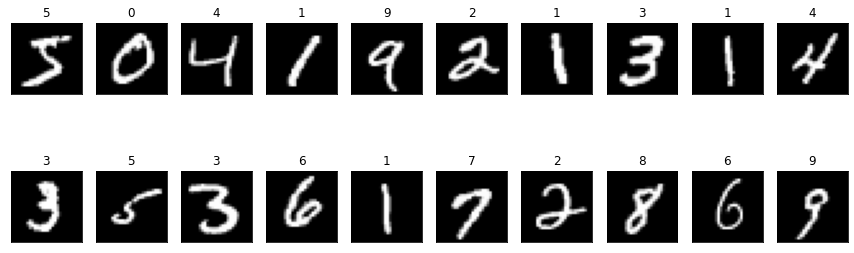

In [4]:
fig = plt.figure(figsize=(15,5))
for i in range(20):
  ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

In [5]:
# Determining the shape of the input image.

img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


**Neural Network Model**

In [6]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

**Plotting the Model**

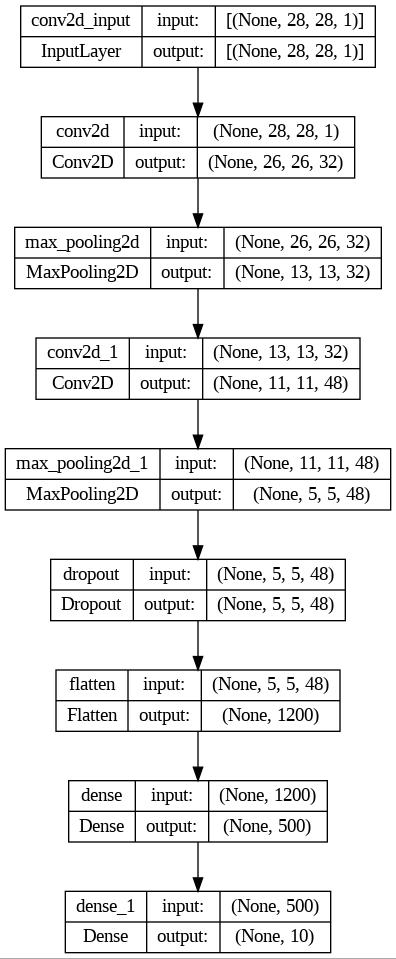

In [8]:
plot_model(model, 'model.jpg', show_shapes=True)

**Compiling the model**

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 42s - loss: 0.2489 - accuracy: 0.9243 - val_loss: 0.0547 - val_accuracy: 0.9838 - 42s/epoch - 100ms/step
Epoch 2/10
422/422 - 42s - loss: 0.0798 - accuracy: 0.9747 - val_loss: 0.0409 - val_accuracy: 0.9885 - 42s/epoch - 99ms/step
Epoch 3/10
422/422 - 45s - loss: 0.0586 - accuracy: 0.9809 - val_loss: 0.0329 - val_accuracy: 0.9905 - 45s/epoch - 107ms/step
Epoch 4/10
422/422 - 46s - loss: 0.0454 - accuracy: 0.9853 - val_loss: 0.0322 - val_accuracy: 0.9910 - 46s/epoch - 109ms/step
Epoch 5/10
422/422 - 45s - loss: 0.0425 - accuracy: 0.9861 - val_loss: 0.0265 - val_accuracy: 0.9928 - 45s/epoch - 107ms/step
Epoch 6/10
422/422 - 47s - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0278 - val_accuracy: 0.9918 - 47s/epoch - 112ms/step
Epoch 7/10
422/422 - 48s - loss: 0.0304 - accuracy: 0.9901 - val_loss: 0.0274 - val_accuracy: 0.9928 - 48s/epoch - 113ms/step
Epoch 8/10
422/422 - 49s - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0248 - val_accuracy: 0.9935 - 49s/epoch - 115m

**Testing Accuracy**

In [10]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy : {accuracy*100}')

Accuracy : 99.39000010490417


**Checking the number and verifying the predicted number is correct or not.**

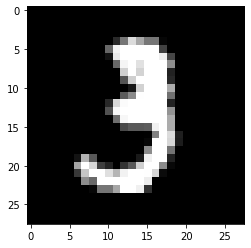

In [11]:
img = x_train[10]

# Now displaying the sample image.

plt.imshow(np.squeeze(img), cmap='gray')
plt.show()

In [12]:
img= img.reshape(1,img.shape[0], img.shape[1], img.shape[2])
pred = model.predict([img])
print("the predicted number is : {}".format(argmax(pred)))

1/1 [==============================] - 0s 101ms/step
the predicted number is : 3
